<a href="https://colab.research.google.com/github/jpmou/bindertest/blob/main/elab2go_DemoPY2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="width:100%;text-align: left; padding: 10px;">
<h1> elab2go Demo-PY2: 
    <br>Datenverwaltung und -Visualisierung mit Pandas und Matplotlib
</h1>
<p>
Das vorliegende Jupyter Notebook des <a href="http://elab2go.de">elab2go-Mobile Engineering Lab</a> 
zeigt am Beispiel eines OPSD-Datensatzes die Datenverwaltung und Datenvisualisierung
mit Hilfe der Python-Bibliotheken Pandas, Matplotlib und Seaborn. Die Codezellen sollten in der angegebenen Reihenfolge ausgeführt werden.
</p> 
</div>

<h2>1. Programmbibliotheken importieren</h2>
<p>
In der ersten Codezelle des Jupyter Notebooks importieren wir die benötigten Programmbibliotheken: Pandas, Matplotlib und Seaborn.
In Python kann man mit Hilfe der <b>import-Anweisung</b> entweder eine komplette Programmbibliothek importieren,
oder nur einzelne Funktionen der Programmbibliothek. 
Beim Import werden für die jeweiligen Bibliotheken oder Funktionen Alias-Namen vergeben: für pandas vergeben wir den Alias pd, etc.
</p>

In [ ]:
import pandas as pd # Wird für Datenverwaltung und Datenbereinigung benötigt
import matplotlib.pyplot as plt # Wird für die Visualisierung, Plots etc. benötigt
import matplotlib.dates as mpd
import seaborn as sns # Erweiterung von matplotlib, schönere Graphen

<h2>2. Daten einlesen</h2>
<p>
Hier wird die Pandas-Funktion read_csv() verwendet, der wir als Parameter den Namen der einzulesenden CSV-Datei übergeben.
Die csv-Datei mit den OPSD-Daten befindet sich in demselben Verzeichnis wie das Jupyter Notebook-Skript.    
</p>

In [ ]:
# Lese CSV-Datei ein 
opsd_full = pd.read_csv('https://elab2go.de/demo-py2/time_series_60min_2016-2020.csv', index_col=0, parse_dates=True) 
# Ersetze fehlende Werte mit 0
opsd_full = opsd_full.fillna(0)
# Funktion zur formatierten Ausgabe eines DataFrames
def display_dataframe( df, rows=6, cols=None):
    with pd.option_context('display.max_rows', rows, 'display.max_columns', cols):  
        display(df);
# Zeige erste und letzte drei Zeilen zur Kontrolle an 
display_dataframe(opsd_full, 4)

,TimestampCET,Verbrauch,Solar(Kapazität),Solar,Wind(Kapazität),Wind
TimestampUTC,,,,,,
2016-01-01 00:00:00,2016-01-01T01:00,40126,38631.0,0.0,32812.0,8579.0
2016-01-01 01:00:00,2016-01-01T02:00,38429,38631.0,0.0,32812.0,8542.0
...,...,...,...,...,...,...
2020-09-30 22:00:00,2020-10-01T00:00,46886,0.0,0.0,0.0,12533.0
2020-09-30 23:00:00,2020-10-01T01:00,45461,0.0,0.0,0.0,12798.0


<h2>3. Datenspalten auswählen</h2>
<p>
Wir benötigen aus der heruntergeladenen csv-Datei nur die Spalten TimestampUTC, Verbrauch, Solar und Wind.
Hier wird die Pandas-Funktion iloc() verwendet, um aus dem Dataframe opsd_full die benötigten Spalten auszuwählen und
in einem neuen DataFrame mit dem Namen opsd zu speichern.
</p>

In [ ]:
# Behalte aus dem Datensatz nur die angegebenen Spalten
opsd_mwh = opsd_full.copy().iloc[:,[1,3,5]];
# Zeige erste und letzte zwei Zeilen zur Kontrolle an 
display_dataframe(opsd_mwh,4)

,Verbrauch,Solar,Wind
TimestampUTC,,,
2016-01-01 00:00:00,40126,0.0,8579.0
2016-01-01 01:00:00,38429,0.0,8542.0
...,...,...,...
2020-09-30 22:00:00,46886,0.0,12533.0
2020-09-30 23:00:00,45461,0.0,12798.0


<h2>4. Datenframe nach Excel exportieren</h2>
<p>
Exportiere den bereinigten Datensatz als Sicherung in eine neue csv-Datei.
</p>

In [ ]:
# Exportiere den bereinigten Datensatz als Sicherung in eine neue csv-Datei
opsd_mwh.to_csv (r'time_series_60min_xs.csv', index = None, header=True)

<h2>5. Datenspalten durch 1000 teilen</h2>
<p>
Damit die Anzeige der Verbrauchsdaten in GWh erfolgt anstelle von MWh, teilen wir die entsprechenden Spalten durch 1000.
Hier verwenden wir die Pandas-Funktion div().    
</p>

In [ ]:
# Teile die Verbrauchsspalten durch 1000, damit die Anzeige in GWh erfolgt
opsd = opsd_mwh.iloc[:,0:3].div(1000)
display_dataframe(opsd, 4)

,Verbrauch,Solar,Wind
TimestampUTC,,,
2016-01-01 00:00:00,40.126,0.0,8.579
2016-01-01 01:00:00,38.429,0.0,8.542
...,...,...,...
2020-09-30 22:00:00,46.886,0.0,12.533
2020-09-30 23:00:00,45.461,0.0,12.798


<h2>6. Extrahiere Jahr, Monat und Tag aus dem Datum</h2>
<p>
Wir fügen dem Datensatz drei neue Spalten hinzu, indem wir aus der index-Spalte das DataFrames
    die entsprechenden Bestandteile extrahieren.
</p>

In [ ]:
# Extrahiere Jahr, Monat und Tag aus dem Datum
opsd['Jahr'] = opsd.index.year
opsd['Monat'] = opsd.index.month
opsd['Tag'] = opsd.index.weekday
display_dataframe(opsd, 4)

,Verbrauch,Solar,Wind,Jahr,Monat,Tag
TimestampUTC,,,,,,
2016-01-01 00:00:00,40.126,0.0,8.579,2016,1,4
2016-01-01 01:00:00,38.429,0.0,8.542,2016,1,4
...,...,...,...,...,...,...
2020-09-30 22:00:00,46.886,0.0,12.533,2020,9,2
2020-09-30 23:00:00,45.461,0.0,12.798,2020,9,2


<h2>7. Datumsbereiche (Zeilen) auswählen</h2>
<p>
Wir wählen mit Hilfe der loc-Funktion verschiedene Datumsbereiche aus.
</p>

In [ ]:
# Wähle den Monat Juli im Jahr 2018 aus
opsd_juli_2018 = opsd.loc['2018-07-01 00':'2018-07-31 23']
# Wähle den Monat Juli im Jahr 2019 aus
opsd_juli_2019 = opsd.loc['2019-07-01 00':'2019-07-31 23']
# Zeige erste und letzte zwei Zeilen des Monats Juli 2019 zur Kontrolle an 
display_dataframe(opsd_juli_2019, 4);

,Verbrauch,Solar,Wind,Jahr,Monat,Tag
TimestampUTC,,,,,,
2019-07-01 00:00:00,42.688,0.0,9.927,2019,7,0
2019-07-01 01:00:00,43.056,0.0,9.409,2019,7,0
...,...,...,...,...,...,...
2019-07-31 22:00:00,45.295,0.0,3.761,2019,7,2
2019-07-31 23:00:00,43.856,0.0,3.990,2019,7,2


<h2>8. Daten aggregieren</h2>
<p>
Wir haben bisher die stündlichen Verbrauchswerte betrachtet, so wie sie in der heruntergeladenen Datei zur Verfügung gestellt waren. 
Für die Betrachtung eines größeren Zeitraums (Monate und Jahre) benötigen wir die Verbrauchswerte pro Tag und pro Monat.
Wir müssen als Nächstes also eine Änderung der Zeitskala (Resampling) durchführen.
Mit Resampling ist der Prozess gemeint, der eine Zeitreihe von einer Frequenz in eine
andere überführt.
</p>

In [ ]:
# Wähle Spalten aus
spalten = ['Verbrauch', 'Wind', 'Solar']
# Gruppiere jede der Spalten nach Tag
opsd_tag = opsd[spalten].resample('D').sum()

# Gruppiere jede der Spalten nach Woche
# Aggregiere die Werte über den Mittelwert
opsd_woche = opsd[spalten].resample('W').mean()

# Gruppiere jede der Spalten nach Monat
# Monate mit weniger als 28 Tagen werden nicht gezählt
opsd_monat = opsd[spalten].resample('M').sum(min_count=28)

opsd_tag['Wind+Solar'] = opsd_tag['Wind'] + opsd_tag['Solar']
opsd_tag = opsd_tag.round(decimals = 2)
# Zeige erste und letzte drei Zeilen zur Kontrolle an 
display_dataframe(opsd_tag, 4)

,Verbrauch,Wind,Solar,Wind+Solar
TimestampUTC,,,,
2016-01-01,1007.11,107.21,18.56,125.77
2016-01-02,1147.89,409.62,9.40,419.02
...,...,...,...,...
2020-09-29,1388.26,73.21,88.97,162.18
2020-09-30,1386.55,128.03,115.78,243.81


In [ ]:
# Exportiere den bereinigten Datensatz als Sicherung in eine neue csv-Datei
opsd_tag.to_csv (r'opsd_tag_2016-2020.csv', index = True, header=True)

<h2>9. Datenvisualisierung</h2>

<h3>Täglicher Stromverbrauch: 2016 bis 2020</h3>


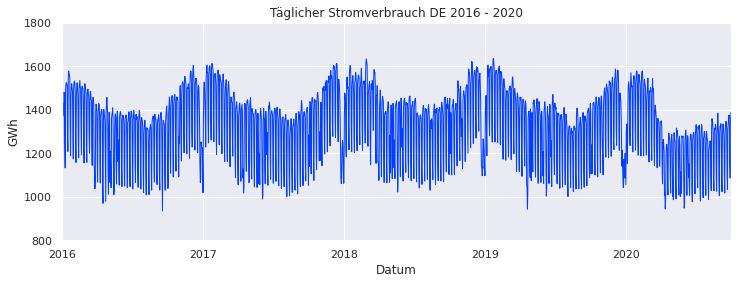

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(12, 4)})
sns.set_color_codes('bright')
ax = opsd_tag['Verbrauch'].plot(lineWidth=1, color='b')
ax.set_title('Täglicher Stromverbrauch DE 2016 - 2020')
ax.set_xlabel('Datum');
ax.set_ylabel('GWh');
ax.set_ylim(800,1800)
plt.savefig('juno_out_6.svg', dpi=400, bbox_inches='tight')

<h3>Monatlicher Verbrauch 2016 bis 2020</h3>


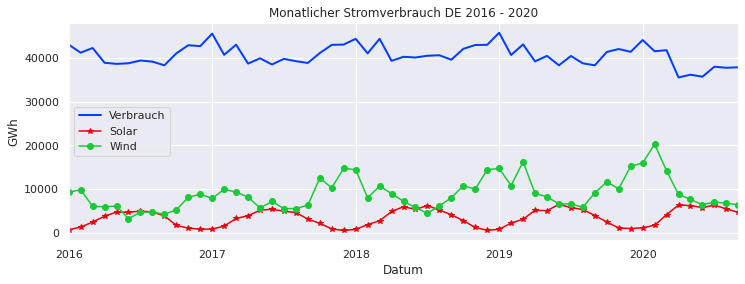

In [ ]:
# Visualisiere den monatlichen Verbrauch
ax = opsd_monat["Verbrauch"].plot(lineWidth=2, color='b')
ax = opsd_monat["Solar"].plot(lineWidth=1.5, color='r', marker='*',)
ax = opsd_monat["Wind"].plot(lineWidth=1.5, color='g', marker='o')
ax.legend();
ax.set_title('Monatlicher Stromverbrauch DE 2016 - 2020')
ax.set_xlabel('Datum');
ax.set_ylabel('GWh');
plt.savefig('juno_out_7.svg', dpi=400, bbox_inches='tight')

<h3>Täglicher Stromverbrauch 2016 vs. 2019</h3>
<p>
</p>

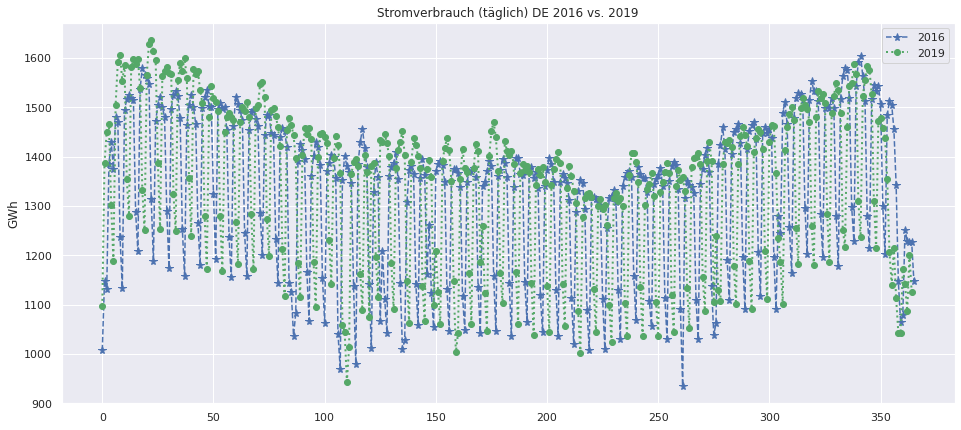

In [ ]:
import matplotlib.dates as mdates
# Extrahiere darzustellende Daten
opsd_2016 = opsd_tag.loc['2016-01-01':'2016-12-31']
opsd_2019 = opsd_tag.loc['2019-01-01':'2019-12-31']
# Setze die Größe der Anzeige
sns.set(rc={'figure.figsize':(16, 7)}) 
# Zwei plot auf Achse ax
fig, ax = plt.subplots()
ax.plot(opsd_2016["Verbrauch"].values, label='2016', color='b', linestyle='dashed', marker='*', markersize='8')
ax.plot(opsd_2019["Verbrauch"].values, label='2019', color='g', linestyle=':', linewidth=2, marker='o')

ax.set_ylabel('GWh')
ax.set_title('Stromverbrauch (täglich) DE 2016 vs. 2019')
ax.legend(); # wird aus den labels erzeugt

<h2>10. Interaktive Visualisierung</h2>
<p>
</p>

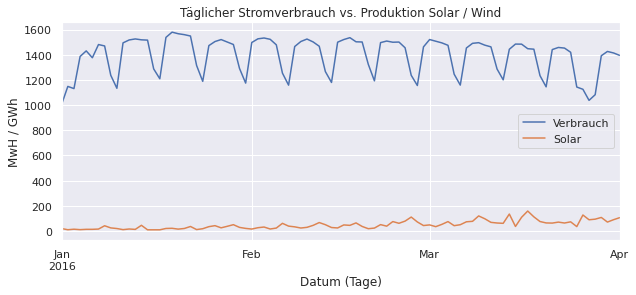

In [ ]:
# (1) Hilfsfunktion für die interaktive Ausgabe
def select_data(datumVon, datumBis, spalten): 
    ''' Funktion plottet die ausgewählten Spalten für den angegebenen Datumsbereich'''
    df = opsd_tag.loc[datumVon:datumBis,spalten]; 
    sns.set(rc={'figure.figsize':(10, 4)}) 
    ax = df.plot(); 
    ax.set_title("Täglicher Stromverbrauch vs. Produktion Solar / Wind");
    ax.set_xlabel('Datum (Tage)')
    ax.set_ylabel('MwH / GWh');
select_data('2016-01-01', '2016-04-01', ['Verbrauch', 'Solar'])

In [ ]:
import ipywidgets as wd
from ipywidgets import interactive_output, VBox, HBox, DatePicker
import datetime as dt
 
# Widgets für die Auswahl des Datums und der Spalten      
datum_von = wd.DatePicker(description='Datum von',  
                          value = dt.date(2016,1,1))
datum_bis = wd.DatePicker(description='Datum bis',  
                          value = dt.date(2020,9,30)) 
ui_spalten = wd.SelectMultiple(options=opsd_tag.columns[0:3], 
            value=list(opsd_tag.columns[0:3]), rows=3) 
ui_parameter = wd.HBox([wd.VBox([datum_von, datum_bis]), ui_spalten])
 
# Interaktive Ausgabe mit interactive_output
out = wd.interactive_output(select_data, 
    {'datumVon': datum_von, 'datumBis': datum_bis, 
    'spalten': ui_spalten})
app1 = wd.Accordion([ui_parameter])
app1.set_title(0, 'Interaktive Visualisierung')
app2 = wd.Accordion([out])
app2.set_title(0, 'Graph')
display(app1)
display(app2)

Accordion(children=(HBox(children=(VBox(children=(DatePicker(value=datetime.date(2016, 1, 1), description='Dat…

Accordion(children=(Output(),), _titles={'0': 'Graph'})